In [10]:
from twelve_api import fetch_forex_dataframe
from features import generate_features
from regime_hmm import fit_hmm_model
from regime_gmm import fit_gmm_model
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = fetch_forex_dataframe("EUR/USD", interval="30min", output_size=1000)
df_feat = generate_features(df)

In [12]:
df_hmm, hmm_metrics = fit_hmm_model(df_feat, n_components=2)
df_gmm, gmm_metrics = fit_gmm_model(df_feat, n_components=2)

In [13]:
print("📈 HMM Metrics:", hmm_metrics)
print("📊 GMM Metrics:", gmm_metrics)

📈 HMM Metrics: {'sharpe': np.float64(0.27), 'total_return': np.float64(2.87), 'max_drawdown': np.float64(-1.36)}
📊 GMM Metrics: {'sharpe': np.float64(0.68), 'total_return': np.float64(3.26), 'max_drawdown': np.float64(-0.17)}


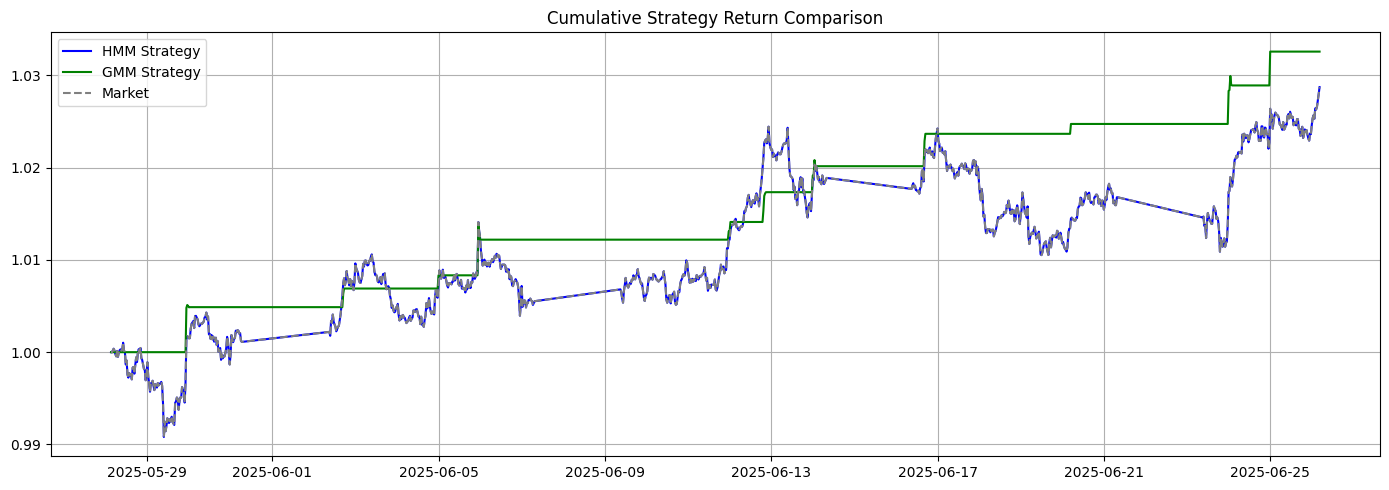

In [14]:
plt.figure(figsize=(14, 5))
plt.plot(df_hmm["datetime"], df_hmm["cumulative_strategy_return"], label="HMM Strategy", color="blue")
plt.plot(df_gmm["datetime"], df_gmm["cumulative_strategy_return"], label="GMM Strategy", color="green")
plt.plot(df_feat["datetime"], (1 + df_feat["return"]).cumprod(), label="Market", color="gray", linestyle="--")
plt.title("Cumulative Strategy Return Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()